In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("../input/pima-diabetes-dataset/Diabetes.csv")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
title_mapping = {'YES':1,'NO':0}
df[' Class variable']=df[' Class variable'].map(title_mapping)

In [4]:
col=['n_pregnant','glucose_conc','bp','skin_len','insulin','bmi','pedigree_fun','age','Output']
df.columns=col
df.head()

,n_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_true_count = len(df.loc[df['Output'] == True])
diabetes_false_count = len(df.loc[df['Output'] == False])
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [6]:
col=['glucose_conc','bp','insulin','bmi','skin_len']
for i in col:
    df[i].replace(0, np.nan, inplace= True)

In [7]:
df.head()

,n_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
df.isnull().sum()

n_pregnant        0
glucose_conc      5
bp               35
skin_len        227
insulin         374
bmi              11
pedigree_fun      0
age               0
Output            0
dtype: int64

In [9]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Output']].groupby(['Output'])[[var]].median().reset_index()
    return temp

In [10]:
median_target('insulin')

,Output,insulin
0,0,102.5
1,1,169.5


In [11]:
df.loc[(df['Output'] == 0 ) & (df['insulin'].isnull()), 'insulin'] = 102.5
df.loc[(df['Output'] == 1 ) & (df['insulin'].isnull()), 'insulin'] = 169.5

In [12]:
median_target('glucose_conc')

,Output,glucose_conc
0,0,107.0
1,1,140.0


In [13]:
df.loc[(df['Output'] == 0 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 107
df.loc[(df['Output'] == 1 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 140

In [14]:
median_target('skin_len')

,Output,skin_len
0,0,27.0
1,1,32.0


In [15]:
df.loc[(df['Output'] == 0 ) & (df['skin_len'].isnull()), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len'].isnull()), 'skin_len'] = 32

In [16]:
median_target('bp')

,Output,bp
0,0,70.0
1,1,74.5


In [17]:
df.loc[(df['Output'] == 0 ) & (df['bp'].isnull()), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp'].isnull()), 'bp'] = 74.5

In [18]:
median_target('bmi')

,Output,bmi
0,0,30.1
1,1,34.3


In [19]:
df.loc[(df['Output'] == 0 ) & (df['bmi'].isnull()), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi'].isnull()), 'bmi'] = 34.3

In [20]:
df.isnull().sum()

n_pregnant      0
glucose_conc    0
bp              0
skin_len        0
insulin         0
bmi             0
pedigree_fun    0
age             0
Output          0
dtype: int64

In [21]:
df

,n_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


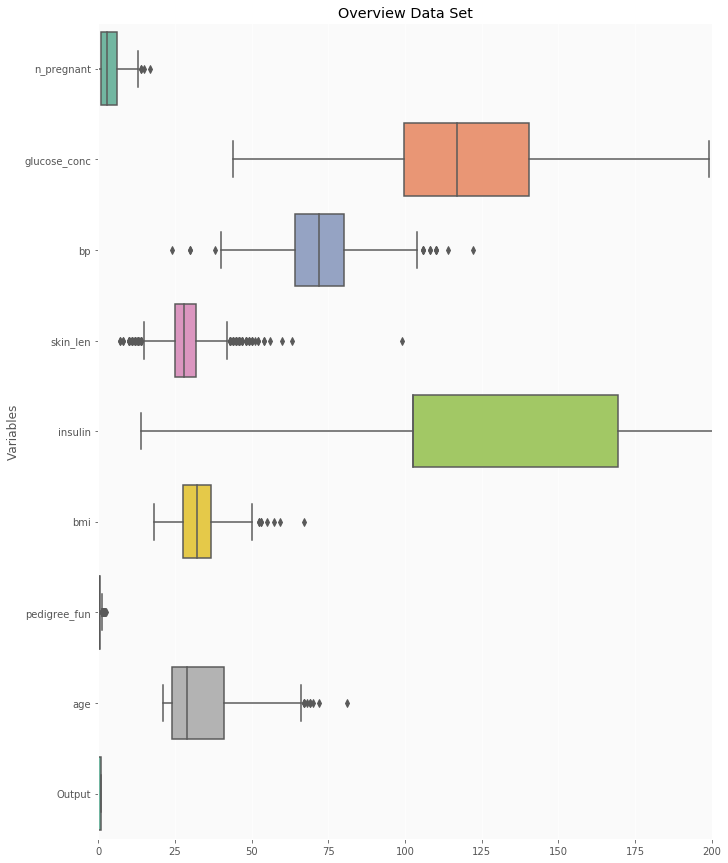

In [22]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

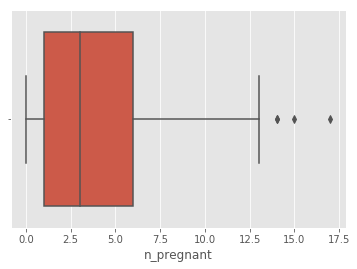

In [23]:
sns.boxplot(df.n_pregnant)

In [24]:
df['n_pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: n_pregnant, dtype: int64

In [25]:
median_target('n_pregnant')

,Output,n_pregnant
0,0,2
1,1,4


In [26]:
df.loc[(df['Output'] == 0 ) & (df['n_pregnant']>13), 'n_pregnant'] = 2
df.loc[(df['Output'] == 1 ) & (df['n_pregnant']>13), 'n_pregnant'] = 4

In [27]:
df['n_pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      72
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
Name: n_pregnant, dtype: int64

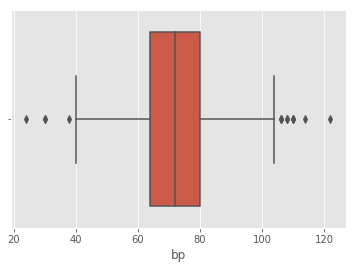

In [28]:
sns.boxplot(df.bp)

In [29]:
median_target('bp')

,Output,bp
0,0,70.0
1,1,74.5


In [30]:
df.loc[(df['Output'] == 0 ) & (df['bp']<40), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp']<40), 'bp'] = 74.5

In [31]:
df.loc[(df['Output'] == 0 ) & (df['bp']>103), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp']>103), 'bp'] = 74.5

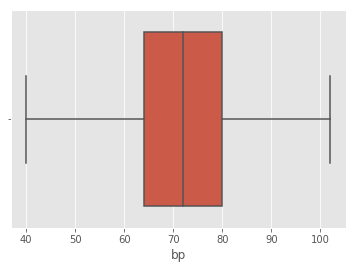

In [32]:
sns.boxplot(df.bp)

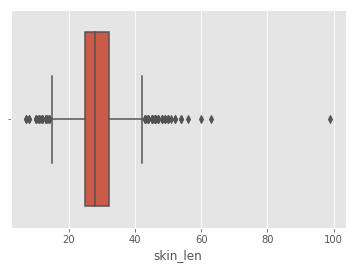

In [33]:
sns.boxplot(df.skin_len)

In [34]:
median_target('skin_len')

,Output,skin_len
0,0,27.0
1,1,32.0


In [35]:
df.loc[(df['Output'] == 0 ) & (df['skin_len']>38), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len']>38), 'skin_len'] = 32

In [36]:
df.loc[(df['Output'] == 0 ) & (df['skin_len']<20), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len']<20), 'skin_len'] = 32

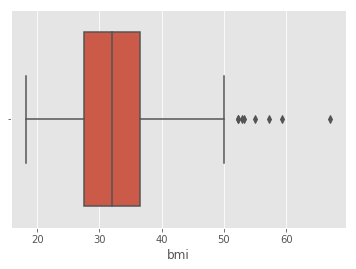

In [37]:
sns.boxplot(df.bmi)

In [38]:
median_target('bmi')

,Output,bmi
0,0,30.1
1,1,34.3


In [39]:
df.loc[(df['Output'] == 0 ) & (df['bmi']>48), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi']>48), 'bmi'] = 34.3

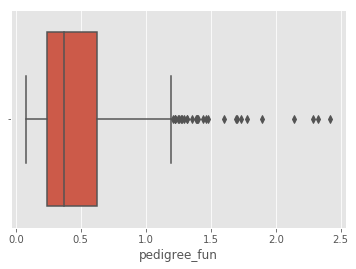

In [40]:
sns.boxplot(df.pedigree_fun)

In [41]:
median_target('pedigree_fun')

,Output,pedigree_fun
0,0,0.336
1,1,0.449


In [42]:
df.loc[(df['Output'] == 0 ) & (df['pedigree_fun']>1), 'pedigree_fun'] = 0.336
df.loc[(df['Output'] == 1 ) & (df['pedigree_fun']>1), 'pedigree_fun'] = 0.449

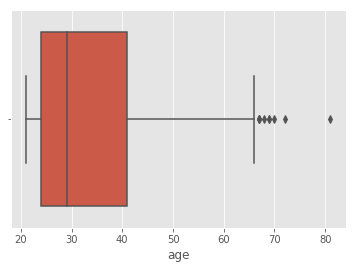

In [43]:
sns.boxplot(df.age)

In [44]:
median_target('age')

,Output,age
0,0,27
1,1,36


In [45]:
df.loc[(df['Output'] == 0 ) & (df['age']>61), 'age'] = 27
df.loc[(df['Output'] == 1 ) & (df['age']>61), 'age'] = 36

In [46]:
X = df.drop('Output', 1)
y = df['Output']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [48]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

## SVM With RBF Kernel

In [49]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
y_pred=model.predict(x_test)

In [51]:
accuracy_score(y_test,y_pred)

0.9155844155844156

In [52]:
confusion_matrix(y_test,y_pred)

array([[99,  8],
       [ 5, 42]])

## SVM With Linear Kernel

In [53]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
y_pred=model.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred)

0.8961038961038961

In [56]:
confusion_matrix(y_test,y_pred)

array([[96, 11],
       [ 5, 42]])

## Artificial Neural Networks

In [57]:
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten

Using TensorFlow backend.


In [58]:
model = Sequential()
model.add(Dense(32,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

In [59]:
print(model.summary())
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=10, epochs=50, verbose=1, validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test,y_test, verbose=0)
print("Loss : "+str(loss))
print("Accuracy :"+str(accuracy*100.0))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              